In [ ]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files

In [ ]:
!pwd
os.environ['KAGGLE_CONFIG_DIR']='/content'

/content


In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600  ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d realtimear/multidomain-image-characteristics-dataset/Dataset/Birds

 95% 128M/135M [00:03<00:00, 68.9MB/s]
100% 135M/135M [00:03<00:00, 43.1MB/s]


In [ ]:
! unzip multidomain-image-characteristics-dataset.zip

Archive:  multidomain-image-characteristics-dataset.zip
  inflating: Dataset/Animals/animals.ods  
  inflating: Dataset/Animals/cats/cat1.jpg  
  inflating: Dataset/Animals/cats/cat10.jpg  
  inflating: Dataset/Animals/cats/cat100.jpg  
  inflating: Dataset/Animals/cats/cat101.jpg  
  inflating: Dataset/Animals/cats/cat102.jpg  
  inflating: Dataset/Animals/cats/cat103.jpg  
  inflating: Dataset/Animals/cats/cat104.jpg  
  inflating: Dataset/Animals/cats/cat105.jpg  
  inflating: Dataset/Animals/cats/cat106.jpg  
  inflating: Dataset/Animals/cats/cat107.jpg  
  inflating: Dataset/Animals/cats/cat108.jpg  
  inflating: Dataset/Animals/cats/cat109.jpg  
  inflating: Dataset/Animals/cats/cat11.jpg  
  inflating: Dataset/Animals/cats/cat110.jpg  
  inflating: Dataset/Animals/cats/cat111.jpg  
  inflating: Dataset/Animals/cats/cat112.jpg  
  inflating: Dataset/Animals/cats/cat113.jpg  
  inflating: Dataset/Animals/cats/cat114.jpg  
  inflating: Dataset/Animals/cats/cat115.jpg  
  inflating:

In [ ]:
#!curl -o others.zip "https://download.wetransfer.com/eugv/d7ffbac24ff4208ef7024296be3b2afc20220620053808/5058c7767c7c544bc675a13d84c264d737298362/wetransfer_others_2022-06-20_0538.zip?token=eyJhbGciOiJIUzI1NiJ9.eyJpYXQiOjE2NTU3MDQxOTEsImV4cCI6MTY1NTcwNDc5MSwidW5pcXVlIjoiZDdmZmJhYzI0ZmY0MjA4ZWY3MDI0Mjk2YmUzYjJhZmMyMDIyMDYyMDA1MzgwOCIsImZpbGVuYW1lIjoid2V0cmFuc2Zlcl9vdGhlcnNfMjAyMi0wNi0yMF8wNTM4LnppcCIsIndheWJpbGxfdXJsIjoiaHR0cDovL3N0b3JtLWludGVybmFsLnNlcnZpY2UuZXUtd2VzdC0xLndldHJhbnNmZXIubmV0L2FwaS93YXliaWxscz9zaWduZWRfd2F5YmlsbF9pZD1leUpmY21GcGJITWlPbnNpYldWemMyRm5aU0k2SWtKQmFITkxkMmhoYzNOV2NVRlJRVDBpTENKbGVIQWlPaUl5TURJeUxUQTJMVEl3VkRBMk9qVTVPalV3TGpBd01Gb2lMQ0p3ZFhJaU9pSjNZWGxpYVd4c1gybGtJbjE5LS02MWNmMjIzZDk4NDFkYjdkZTBlYTQzMmUzNDQ0MjMzNTBiOWMwNTc0ZDJjMzliYzU0OGNhM2IyYzdjNWY0YmZhIiwiZmluZ2VycHJpbnQiOiI1MDU4Yzc3NjdjN2M1NDRiYzY3NWExM2Q4NGMyNjRkNzM3Mjk4MzYyIiwiY2FsbGJhY2siOiJ7XCJmb3JtZGF0YVwiOntcImFjdGlvblwiOlwiaHR0cDovL2Zyb250ZW5kLnNlcnZpY2UuZXUtd2VzdC0xLndldHJhbnNmZXIubmV0L3dlYmhvb2tzL2JhY2tlbmRcIn0sXCJmb3JtXCI6e1widHJhbnNmZXJfaWRcIjpcImQ3ZmZiYWMyNGZmNDIwOGVmNzAyNDI5NmJlM2IyYWZjMjAyMjA2MjAwNTM4MDhcIixcImRvd25sb2FkX2lkXCI6MTU2MDM3MjExOTR9fSJ9.akDUYJvCTwJOuCmSdpVJeXG2q0VSs-1PiBaMQGIgLdY&cf=y" -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:101.0) Gecko/20100101 Firefox/101.0" -H "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8" -H "Accept-Language: en-US,en;q=0.5" -H "Accept-Encoding: gzip, deflate, br" -H "Referer: https://wetransfer.com/" -H "Connection: keep-alive" -H "Cookie: _wt_snowplowid.0497=be4c2c38-2632-4d37-abc5-e2d1bd7c11f0.1653389068.5.1655704190.1653650580.711bf049-7de6-4312-93a5-2554db1a0acd; auth_session_uuid=f6e8d581-05df-47f0-8aca-ee11d8a30b4e; _gcl_au=1.1.1969794957.1653389073; wt_privacy="%"7B"%"22v"%"22"%"3A"%"223"%"3A20190527"%"22"%"2C"%"22f"%"22"%"3A1"%"2C"%"22a"%"22"%"3A1"%"2C"%"22t"%"22"%"3A1"%"7D; wt_first_visit=1653389073204; wt_tandc=20190527"%"3A1; sp=9487e778-8918-42e5-a19f-ae1729d875bf; _ga=GA1.2.1872555267.1653389076; _fbp=fb.1.1653389076840.2138156562; _clck=ztt6u8|1|f2h|0; _rdt_uuid=1653389099220.71a6ff0c-221f-4861-840a-96c1a182d6df; _au_1d=AU1D-0100-001653389100-781U7WMO-CTUP; wt_takeover=6"%"2F20"%"2F2022"%"2C3; cto_bundle=JuOcd185aEhQRXpYaGwlMkY3RUx4eTZWanYlMkJWTzRwSzg2Y2hRRHBlNm9FSTZXeXBYNzdZOGJFcnZTUDFpT3F6NlhLN0g4MlZqJTJGN2NFcWtEQk81NHdmR3JLcXBOQUxOUkhWVGU4diUyQkE5Q3hyUVkxWWJ5NzYlMkJDN2x6cjA4USUyRmRRY0s5S0JxTFlCZG95MmlPQWdDUWpHMnBjZ2hwdkElM0QlM0Q; wt_ttype=4; wt_sent=4; wt_downloaded=15; _au_last_seen_apn=1653538558826; _au_last_seen_ttd=1653538558826; _au_last_seen_pub=1653538558826; _au_last_seen_adx=1653538558826; _au_last_seen_goo=1653538558826; _au_last_seen_taboola=1653538558826; _au_last_seen_bees=1653538558826; _au_last_seen_smart=1653538558826; _au_last_seen_ado=1653538558826; _au_last_seen_impr=1653538558826; _au_last_seen_openx=1653540335450; _au_last_seen_rub=1653540335450; _au_last_seen_mediamath=1653540335450; _au_last_seen_unruly=1653540335450; _au_last_seen_son=1653540335450; _au_last_seen_ppnt=1653540335450; _tt_enable_cookie=1; _ttp=23f1e28b-c59a-45cd-b14b-e9988c7fdfa3; _wt_snowplowses.0497=*; _gid=GA1.2.308978283.1655702964; _uetsid=f0a2aca0f05911ecb82df798aa2e09fb; _uetvid=7ffd6ee0db4e11ecaec4c36c5ad633ed; _clsk=1ic3vrh|1655703899860|1|0|n.clarity.ms/collect" -H "Upgrade-Insecure-Requests: 1" -H "Sec-Fetch-Dest: document" -H "Sec-Fetch-Mode: navigate" -H "Sec-Fetch-Site: same-site" -H "Sec-Fetch-User: ?1"

In [ ]:
!unzip others.zip

Archive:  others.zip
   creating: others/
   creating: others/test/
   creating: others/test/0/
  inflating: others/test/0/photo-1485470733090-0aae1788d5af.jpg  
  inflating: others/test/0/photo-1485550409059-9afb054cada4.jpg  
  inflating: others/test/0/photo-1488900128323-21503983a07e.jpg  
  inflating: others/test/0/photo-1496449903678-68ddcb189a24.jpg  
  inflating: others/test/0/photo-1497034825429-c343d7c6a68f.jpg  
  inflating: others/test/0/photo-1497215728101-856f4ea42174.jpg  
  inflating: others/test/0/photo-1497912300441-f9ab6a41008b.jpg  
  inflating: others/test/0/photo-1499195333224-3ce974eecb47.jpg  
  inflating: others/test/0/photo-1499636136210-6f4ee915583e.jpg  
  inflating: others/test/0/photo-1501446393885-828292b7670a.jpg  
  inflating: others/test/0/photo-1503023345310-bd7c1de61c7d.jpg  
  inflating: others/test/0/photo-1503162894963-8c333941fb01.jpg  
  inflating: others/test/0/photo-1504194569341-48a2e831a3a7.jpg  
  inflating: others/test/0/photo-1504297050568

In [ ]:
## dataset path
dataset_path_train = Path(r'/content/Dataset/Birds/1')

# file path for all pngs -> to list png [1.png,2.png,.....]
file_path_train = list(dataset_path_train.glob(r'**/*.jpg'))

print('filepath: ',file_path_train)

# lambda function to get labels of images
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path_train))


# path converted to pandas
file_path_train = pd.Series(file_path_train).astype(str)
#print('file_path:',file_path_train)

labels_train = pd.Series(labels_train)
#print('labels',labels_train)


df_train = pd.concat([file_path_train, labels_train], axis=1)
#print(df)


df_train.columns = ['image', 'label']


df_train

filepath:  [PosixPath('/content/Dataset/Birds/1/sparrow35.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow91.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow178.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow52.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow36.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow33.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow196.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow139.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow140.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow137.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow80.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow185.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow168.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow70.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow24.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow102.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow86.jpg'), PosixPath('/content/Dataset/Birds/1/sparrow132.jpg'), PosixPath('/content/Datas

,image,label
0,/content/Dataset/Birds/1/sparrow35.jpg,1
1,/content/Dataset/Birds/1/sparrow91.jpg,1
2,/content/Dataset/Birds/1/sparrow178.jpg,1
3,/content/Dataset/Birds/1/sparrow52.jpg,1
4,/content/Dataset/Birds/1/sparrow36.jpg,1
...,...,...
195,/content/Dataset/Birds/1/sparrow73.jpg,1
196,/content/Dataset/Birds/1/sparrow131.jpg,1
197,/content/Dataset/Birds/1/sparrow3.jpg,1
198,/content/Dataset/Birds/1/sparrow69.jpg,1


In [ ]:
## dataset path
path = Path(r'/content/others/train/0')


# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(path.glob(r'**/*.jpg'))

print('filepath: ',file_path)

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


# path converted to pandas
file_path = pd.Series(file_path).astype(str)

labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)
#print(df)


df.columns = ['image', 'label']


df.value_counts()


filepath:  [PosixPath('/content/others/train/0/photo-1636361479581-5ab1a7a72beb.jpg'), PosixPath('/content/others/train/0/photo-1636127321340-4380c87936f8.jpg'), PosixPath('/content/others/train/0/photo-1637309194017-8ac73fa46c92.jpg'), PosixPath('/content/others/train/0/photo-1638195157505-5a4b33446acb.jpg'), PosixPath('/content/others/train/0/photo-1636146321825-c8dd069be6ee.jpg'), PosixPath('/content/others/train/0/photo-1636015348041-cea51783d2ec.jpg'), PosixPath('/content/others/train/0/photo-1637966495649-c102312261c7.jpg'), PosixPath('/content/others/train/0/photo-1636355761620-712e88f86ade.jpg'), PosixPath('/content/others/train/0/photo-1636145354736-439482e677a5.jpg'), PosixPath('/content/others/train/0/photo-1634521991558-a1f4dbd641db.jpg'), PosixPath('/content/others/train/0/photo-1557517395-f8dff7f191e7.jpg'), PosixPath('/content/others/train/0/photo-1554124819-e6a2f5eed22b.jpg'), PosixPath('/content/others/train/0/photo-1633114127824-14b3207d7d74.jpg'), PosixPath('/content

image                                                         label
/content/others/train/0/photo- (1).jpg                        0        1
/content/others/train/0/photo-1637263793512-438e70642f3c.jpg  0        1
/content/others/train/0/photo-1637264812825-8b1ce6ccb0b9.jpg  0        1
/content/others/train/0/photo-1637266702921-a2eae66c7f9d.jpg  0        1
/content/others/train/0/photo-1637268852311-00c8259636bc.jpg  0        1
                                                                      ..
/content/others/train/0/photo-1635488638958-5dd6137f7995.jpg  0        1
/content/others/train/0/photo-1635500574974-114cb4f49759.jpg  0        1
/content/others/train/0/photo-1635502152437-18e0c22de313.jpg  0        1
/content/others/train/0/photo-1635504979606-b3e2fb1b07f2.jpg  0        1
/content/others/train/0/photo-1639050641575-2a23d8ca1b36.jpg  0        1
Length: 600, dtype: int64

In [ ]:
## dataset path
path = Path(r'/content/others/test/0')


# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(path.glob(r'**/*.jpg'))

print('filepath: ',file_path)

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


# path converted to pandas
file_path = pd.Series(file_path).astype(str)

labels = pd.Series(labels)

df2 = pd.concat([file_path, labels], axis=1)
#print(df)


df2.columns = ['image', 'label']


df2.value_counts()


filepath:  [PosixPath('/content/others/test/0/photo-1604585728556-1749cfd13491.jpg'), PosixPath('/content/others/test/0/photo-1603374431352-8a072a395d6e.jpg'), PosixPath('/content/others/test/0/photo-1506459225024-1428097a7e18.jpg'), PosixPath('/content/others/test/0/photo-1606772108903-340d99f0cb4f.jpg'), PosixPath('/content/others/test/0/photo-1499636136210-6f4ee915583e.jpg'), PosixPath('/content/others/test/0/photo-1497912300441-f9ab6a41008b.jpg'), PosixPath('/content/others/test/0/photo-1627269817325-8da9fc719c29.jpg'), PosixPath('/content/others/test/0/photo-1572502006585-8d45f2d2c72b.jpg'), PosixPath('/content/others/test/0/photo-1485470733090-0aae1788d5af.jpg'), PosixPath('/content/others/test/0/photo-1625393470986-050241dfcc81.jpg'), PosixPath('/content/others/test/0/photo-1632207383665-01e79c402af6.jpg'), PosixPath('/content/others/test/0/photo-1619617345083-9f3857455d2e.jpg'), PosixPath('/content/others/test/0/photo-1611728337177-89dfbbdc7a3a.jpg'), PosixPath('/content/others

image                                                        label
/content/others/test/0/photo-1485470733090-0aae1788d5af.jpg  0        1
/content/others/test/0/photo-1618969322232-92a7aa295ce1.jpg  0        1
/content/others/test/0/photo-1610694308659-fd4340288ba7.jpg  0        1
/content/others/test/0/photo-1611728337177-89dfbbdc7a3a.jpg  0        1
/content/others/test/0/photo-1612052828302-b10880f8e3db.jpg  0        1
                                                                     ..
/content/others/test/0/photo-1575489272413-cb506258027e.jpg  0        1
/content/others/test/0/photo-1576021182211-9ea8dced3690.jpg  0        1
/content/others/test/0/photo-1576442849893-92c987a8ef80.jpg  0        1
/content/others/test/0/photo-1576567559946-60e4729da9f8.jpg  0        1
/content/others/test/0/photo-1633113093730-47449a1a9c6e.jpg  0        1
Length: 200, dtype: int64

In [ ]:
df_train,df_test = train_test_split(df_train,test_size=0.2,random_state=30)

Combining both the test dataset


In [ ]:
df_test=df_test.append(df2)

In [ ]:
df_train

,image,label
125,/content/Dataset/Birds/1/sparrow99.jpg,1
60,/content/Dataset/Birds/1/sparrow167.jpg,1
90,/content/Dataset/Birds/1/sparrow56.jpg,1
152,/content/Dataset/Birds/1/sparrow50.jpg,1
40,/content/Dataset/Birds/1/sparrow189.jpg,1
...,...,...
140,/content/Dataset/Birds/1/sparrow188.jpg,1
45,/content/Dataset/Birds/1/sparrow114.jpg,1
173,/content/Dataset/Birds/1/sparrow181.jpg,1
165,/content/Dataset/Birds/1/sparrow151.jpg,1


In [ ]:
df_test

,image,label
143,/content/Dataset/Birds/1/sparrow97.jpg,1
81,/content/Dataset/Birds/1/sparrow170.jpg,1
26,/content/Dataset/Birds/1/sparrow65.jpg,1
150,/content/Dataset/Birds/1/sparrow42.jpg,1
124,/content/Dataset/Birds/1/sparrow134.jpg,1
...,...,...
195,/content/others/test/0/photo-1567316106249-b2e...,0
196,/content/others/test/0/photo-1614191697800-ff8...,0
197,/content/others/test/0/photo-1604948209002-73b...,0
198,/content/others/test/0/photo-1604854657221-428...,0


In [ ]:
df_train.label.value_counts()

1    160
Name: label, dtype: int64

In [ ]:
df_test.label.value_counts()

0    200
1     40
Name: label, dtype: int64

In [ ]:
type(df_train)

pandas.core.frame.DataFrame

In [ ]:
df_train.iloc[:,0]

125               /content/Dataset/Birds/1/sparrow99.jpg
60               /content/Dataset/Birds/1/sparrow167.jpg
90                /content/Dataset/Birds/1/sparrow56.jpg
152               /content/Dataset/Birds/1/sparrow50.jpg
40               /content/Dataset/Birds/1/sparrow189.jpg
                             ...                        
595    /content/others/train/0/photo-1637464947514-e2...
596    /content/others/train/0/photo-1635941607659-ab...
597    /content/others/train/0/photo-1636137674064-4d...
598    /content/others/train/0/photo-1636110351301-dc...
599    /content/others/train/0/photo-1634587462190-7b...
Name: image, Length: 760, dtype: object

In [ ]:
import cv2
from skimage.io import imread, imshow
from skimage import io
import numpy as np

In [ ]:
import shutil

In [ ]:
shutil.rmtree('1')

Used for augmenting images and saving them in an augmented directory, first create the augmented dir to save the images at.

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=45,
            vertical_flip=True,
            width_shift_range=0.2,
            height_shift_range=0.3,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')
for j in range(0,len(df_train)):
  x = io.imread(df_train.iloc[j,0])
  x = x.reshape((1, ) + x.shape)
  i = 0
  for batch in datagen.flow(x, batch_size=16,
                            save_to_dir='1',
                            save_prefix='sparrow',
                            save_format='jpg'):
    i += 1
    if i > 4:
       break

In [ ]:
## dataset path
path = Path(r'/content/1')


# file path for all pngs -> to list png [1.png,2.png,.....]
file_path = list(path.glob(r'**/*.jpg'))

print('filepath: ',file_path)

# lambda function to get labels of images
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


# path converted to pandas
file_path = pd.Series(file_path).astype(str)

labels = pd.Series(labels)

df_aug = pd.concat([file_path, labels], axis=1)
#print(df)


df_aug.columns = ['image', 'label']


df_aug.value_counts()


filepath:  [PosixPath('/content/1/sparrow_0_2480.jpg'), PosixPath('/content/1/sparrow_0_8145.jpg'), PosixPath('/content/1/sparrow_0_9197.jpg'), PosixPath('/content/1/sparrow_0_6936.jpg'), PosixPath('/content/1/sparrow_0_6954.jpg'), PosixPath('/content/1/sparrow_0_8443.jpg'), PosixPath('/content/1/sparrow_0_7319.jpg'), PosixPath('/content/1/sparrow_0_741.jpg'), PosixPath('/content/1/sparrow_0_6738.jpg'), PosixPath('/content/1/sparrow_0_6956.jpg'), PosixPath('/content/1/sparrow_0_5962.jpg'), PosixPath('/content/1/sparrow_0_6805.jpg'), PosixPath('/content/1/sparrow_0_7219.jpg'), PosixPath('/content/1/sparrow_0_1104.jpg'), PosixPath('/content/1/sparrow_0_3442.jpg'), PosixPath('/content/1/sparrow_0_6318.jpg'), PosixPath('/content/1/sparrow_0_1181.jpg'), PosixPath('/content/1/sparrow_0_9592.jpg'), PosixPath('/content/1/sparrow_0_1592.jpg'), PosixPath('/content/1/sparrow_0_6790.jpg'), PosixPath('/content/1/sparrow_0_6774.jpg'), PosixPath('/content/1/sparrow_0_8433.jpg'), PosixPath('/content/1

image                          label
/content/1/sparrow_0_1013.jpg  1        1
/content/1/sparrow_0_5613.jpg  1        1
/content/1/sparrow_0_7075.jpg  1        1
/content/1/sparrow_0_7085.jpg  1        1
/content/1/sparrow_0_7087.jpg  1        1
                                       ..
/content/1/sparrow_0_4027.jpg  1        1
/content/1/sparrow_0_4039.jpg  1        1
/content/1/sparrow_0_4044.jpg  1        1
/content/1/sparrow_0_4045.jpg  1        1
/content/1/sparrow_0_9990.jpg  1        1
Length: 769, dtype: int64

In [ ]:
df_train=df_train.append(df)


In [ ]:
df_train=df_train.append(df_aug)

In [ ]:
df_train.label.value_counts()

1    929
0    600
Name: label, dtype: int64

In [ ]:
x_train,x_val = train_test_split(df_train,test_size=0.2,random_state=30)

In [ ]:
print("Shape of training data", x_train.shape)
print("Shape of test data", df_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (1223, 2)
Shape of test data (240, 2)
Shape of validation data (306, 2)


In [ ]:
image_data_generator = ImageDataGenerator(
    rescale=1./255,
)
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=df_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='binary',shuffle=False)

Found 1223 validated image filenames belonging to 2 classes.
Found 240 validated image filenames belonging to 2 classes.
Found 306 validated image filenames belonging to 2 classes.


In [ ]:
input_shape=(200,200,3)

In [ ]:
#Model for 86percent accuracy with better generalization and with 25 epochs
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #tf.keras.layers.Dense(256),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Model for 85percent accuracy with better generalization and with 10 epochs
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #tf.keras.layers.Dense(256),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 50, 50, 64)       

In [ ]:
from tensorflow.keras.optimizers import Adam
#Adaptive Movement Estimation 

In [ ]:
model2.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model2.fit(train, validation_data=val, epochs=10, callbacks=callback)

Epoch 1/10
39/39 [==============================] - 147s 4s/step - loss: 1.3350 - accuracy: 0.5879 - val_loss: 0.6687 - val_accuracy: 0.6144
Epoch 2/10
39/39 [==============================] - 141s 4s/step - loss: 0.5973 - accuracy: 0.7065 - val_loss: 0.6009 - val_accuracy: 0.7614
Epoch 3/10
39/39 [==============================] - 146s 4s/step - loss: 0.4169 - accuracy: 0.8438 - val_loss: 0.4847 - val_accuracy: 0.8235
Epoch 4/10
39/39 [==============================] - 145s 4s/step - loss: 0.4030 - accuracy: 0.8430 - val_loss: 0.4270 - val_accuracy: 0.8464
Epoch 5/10
39/39 [==============================] - 150s 4s/step - loss: 0.3463 - accuracy: 0.8692 - val_loss: 0.4454 - val_accuracy: 0.7908
Epoch 6/10
39/39 [==============================] - 150s 4s/step - loss: 0.3286 - accuracy: 0.8823 - val_loss: 0.3310 - val_accuracy: 0.8824
Epoch 7/10
39/39 [==============================] - 148s 4s/step - loss: 0.3046 - accuracy: 0.8880 - val_loss: 0.3936 - val_accuracy: 0.8693
Epoch 8/10
39

In [ ]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

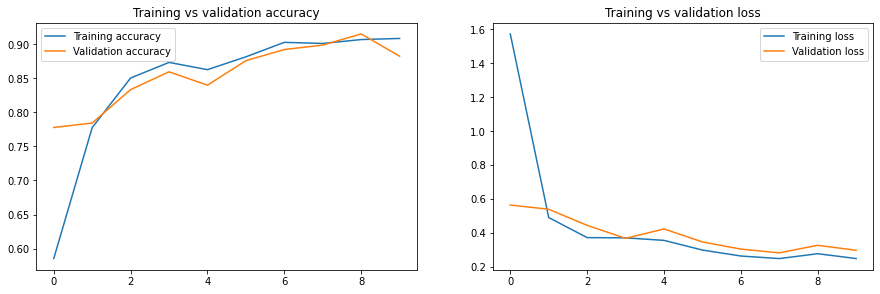

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [ ]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 200, 200, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[1.]


In [ ]:
model2.save('Birds_and_others_with_augmented_with_vgg4.h5')

In [ ]:
import uuid

str(uuid.uuid4())

'4e83791b-5726-4e33-8a6e-a52224c688f0'

In [ ]:
model3 = load_model('Birds_and_others_with_augmented.h5')

In [ ]:
est_accuracy = model2.evaluate(test)[1]

8/8 [==============================] - 10s 1s/step - loss: 0.2894 - accuracy: 0.8500


In [ ]:
#Best model so far with better generalization and accuracy
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=input_shape),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3,3),padding='same', activation='relu',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 50, 50, 64)       

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

history = model.fit(train, validation_data=val, epochs=10, callbacks=callback)

Epoch 1/10
39/39 [==============================] - 169s 4s/step - loss: 1.5714 - accuracy: 0.5854 - val_loss: 0.5644 - val_accuracy: 0.7778
Epoch 2/10
39/39 [==============================] - 156s 4s/step - loss: 0.4908 - accuracy: 0.7776 - val_loss: 0.5396 - val_accuracy: 0.7843
Epoch 3/10
39/39 [==============================] - 149s 4s/step - loss: 0.3726 - accuracy: 0.8504 - val_loss: 0.4448 - val_accuracy: 0.8333
Epoch 4/10
39/39 [==============================] - 150s 4s/step - loss: 0.3713 - accuracy: 0.8733 - val_loss: 0.3683 - val_accuracy: 0.8595
Epoch 5/10
39/39 [==============================] - 146s 4s/step - loss: 0.3563 - accuracy: 0.8626 - val_loss: 0.4234 - val_accuracy: 0.8399
Epoch 6/10
39/39 [==============================] - 149s 4s/step - loss: 0.2994 - accuracy: 0.8814 - val_loss: 0.3471 - val_accuracy: 0.8758
Epoch 7/10
39/39 [==============================] - 153s 4s/step - loss: 0.2643 - accuracy: 0.9027 - val_loss: 0.3050 - val_accuracy: 0.8922
Epoch 8/10
39

In [ ]:
model.save('Birdsandothers_with_augmented_vgg4_two_fullyconnected_layers.h5')

In [ ]:
est_accuracy = model.evaluate(test)[1]

8/8 [==============================] - 11s 1s/step - loss: 0.2559 - accuracy: 0.8750
